##Importing Dataset from Kaggle using API

In [ ]:
# ! pip install kaggle
 

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"illiyas","key":"61dbcecfb0278891c889a7147177854a"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

In [ ]:
! kaggle datasets download -d divyeshardeshana/supply-chain-shipment-pricing-data

  0% 0.00/581k [00:00<?, ?B/s]
100% 581k/581k [00:00<00:00, 39.7MB/s]


In [ ]:
ls

kaggle.json  sample_data/  supply-chain-shipment-pricing-data.zip


In [ ]:
!unzip supply-chain-shipment-pricing-data.zip  && rm supply-chain-shipment-pricing-data.zip

Archive:  supply-chain-shipment-pricing-data.zip
  inflating: SCMS_Delivery_History_Dataset.csv  


## Reading Dataset

### Importing packages

In [ ]:
import pandas as pd
import numpy as np

### Reading data

In [ ]:
df = pd.read_csv("/content/SCMS_Delivery_History_Dataset.csv")

In [ ]:
df.head(1)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN


In [ ]:
df.shape

(10324, 33)

The data has 10324 records and 33 features.

In [ ]:
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64
Line Item Value                 float64


## Handling missing values

In [ ]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

3 features have missing data


### handling Shipment mode column

In [ ]:
df['Shipment Mode'].unique()

array(['Air', nan, 'Truck', 'Air Charter', 'Ocean'], dtype=object)

In [ ]:
df['Shipment Mode'].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64

In [ ]:
df = df[df['Shipment Mode'].notna()]

In [ ]:
df.shape

(9964, 33)

### Handling dosage column

In [ ]:
df['Dosage'].unique()

array([nan, '10mg/ml', '150mg', '30mg', '200mg', '200/50mg', '150/300mg',
       '2g', '300mg', '600mg', '1mg/ml', '25mg', '20mg', '250mg', '400mg',
       '20/120mg', '50+153mg', '600/200/300mg', '100mg', '80/20mg/ml',
       '600mg/2ml', '150/200/30mg', '100/25mg', '50mg', '15mg',
       '300/200mg', '150/300/200mg', '133.3/33.3mg', '80mg/ml', '30/6mg',
       '20mg/ml', '40mg', '300/150/300mg', '500/25mg', '30/50/6mg',
       '150/300+200mg', '150/30mg', '150/200/40mg', '30mg/ml',
       '200/300mg', '150/300+300mg', '300/300mg', '60/100/12mg',
       '600/300/300mg', '300/100mg', '30/60mg', '60/30mg', '30/50/60mg',
       '500mg', '125mg', '600/300mg', '60mg', '60/12mg',
       '150/300mg+600mg', '50mg/g'], dtype=object)

As this column is not releavant for our analysis, so we will drop this column.

In [ ]:
df = df.drop('Dosage', 1)

In [ ]:
df.shape

(9964, 32)

### Handling 'Line Item Insurance' Column

In [ ]:
df['Line Item Insurance (USD)'].unique()

array([    nan,  128.  ,  224.93, ..., 5284.04,  134.03,   85.82])

Since the Line Item Insurance column is not relevant to our analysis, we will leave that column

In [ ]:
df = df.drop('Line Item Insurance (USD)', 1)

In [ ]:
df.shape

(9964, 31)

In [ ]:
df.isnull().sum()

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Designation          0
Weight (Kilogr

Now we have handled missing data

## Visualizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Top 10 Countries Wise Count 

South Africa     1364
Nigeria          1158
Côte d'Ivoire     970
Uganda            771
Vietnam           688
Haiti             653
Mozambique        631
Zambia            584
Zimbabwe          526
Tanzania          499
Rwanda            430
Congo, DRC        333
Guyana            232
Ethiopia          198
South Sudan       164
Kenya             111
Burundi            98
Namibia            93
Cameroon           75
Botswana           67
Name: Country, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

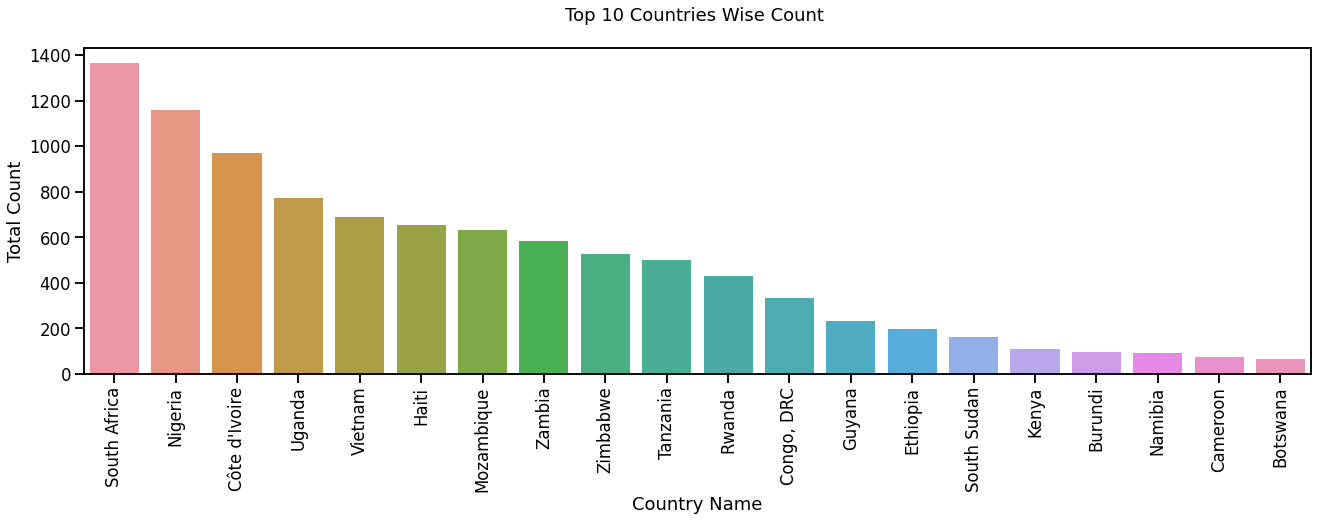

In [ ]:
ItemCount = df["Country"].value_counts().nlargest(20)
print("Top 10 Countries Wise Count \n")
print(ItemCount)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sns.countplot(df['Country'],order = df['Country'].value_counts().nlargest(20).index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')
plt.xticks(rotation=90)


Shipment mode

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


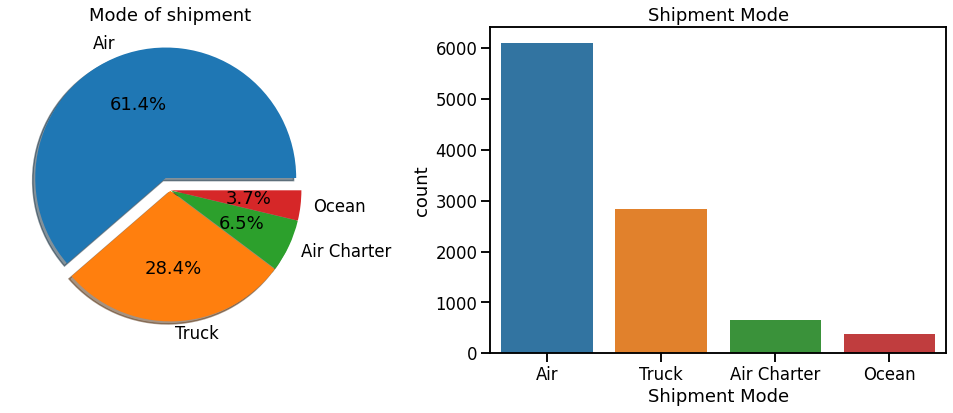

Shipment Mode represents whether the package was shipped through Air , Truck, Air charter, Ocean


In [ ]:
# pie plot to show the days of week 
f,ax=plt.subplots(1,2,figsize=(18,6))
df['Shipment Mode'].value_counts().plot.pie(explode=[0.1,0.005,0.005,0.005],autopct='%1.1f%%',ax=ax[0],shadow=True) 
ax[0].set_title('Mode of shipment')
ax[0].set_ylabel('')
sns.countplot('Shipment Mode', data=df,ax=ax[1])
ax[1].set_title('Shipment Mode')
plt.show()

print('Shipment Mode represents whether the package was shipped through Air , Truck, Air charter, Ocean')

Top 10 Brands 

In [ ]:
df.Brand.unique()

array(['Reveal', 'Generic', 'Determine', 'Stocrin/Sustiva', 'Aluvia',
       'Uni-Gold', 'InstantCHEK', 'Videx', 'First Response', 'Stat-Pak',
       'OraQuick', 'Bioline', 'Viread', 'Capillus', 'Genie', 'Invirase',
       'Zerit', 'Videx EC', 'Ziagen', 'Coartem', 'Viramune', 'Paramax',
       'Atripla', 'Kaletra', 'Epivir', 'Retrovir', 'Norvir', 'Truvada',
       'Clearview', 'Colloidal Gold', 'INSTi', 'Trizivir', 'Visitect',
       'Viracept', 'DoubleCheck', 'Bundi', 'ImmunoComb', 'Crixivan',
       'LAV', 'Intelence', 'Prezista', 'Isentress', 'Reyataz', 'Combivir',
       'Multispot', 'CareStart', 'Hexagon'], dtype=object)

Top Brand Wise Count 

Generic      7072
Determine     783
Uni-Gold      366
Aluvia        238
Kaletra       155
Norvir        129
Stat-Pak      110
Bioline       109
Truvada        85
Videx          81
Name: Brand, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

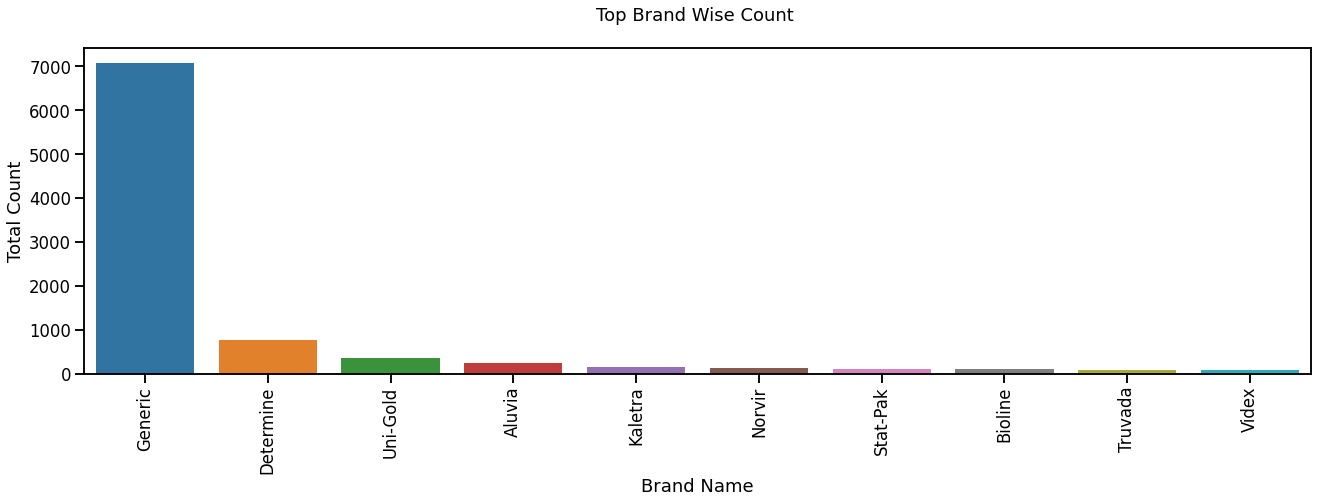

In [ ]:
BrandCount = df["Brand"].value_counts().nlargest(10)
print("Top Brand Wise Count \n")
print(BrandCount)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sns.countplot(df['Brand'],order = df['Brand'].value_counts().nlargest(10).index)
plt.title('Top Brand Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Brand Name')
plt.xticks(rotation=90)

## Total Pack Price for Top 15 Countries with graph

Total Pack Price for Top 15 Countries

Country
Nigeria          25001.47
South Africa     23479.74
Côte d'Ivoire    19227.42
Haiti            19049.30
Uganda           15585.61
Mozambique       14092.40
Vietnam          11963.78
Tanzania         10461.95
Zambia            9931.29
Rwanda            7724.29
Botswana          6540.54
Zimbabwe          6401.27
Kenya             6349.14
Congo, DRC        6032.41
Guyana            5442.85
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

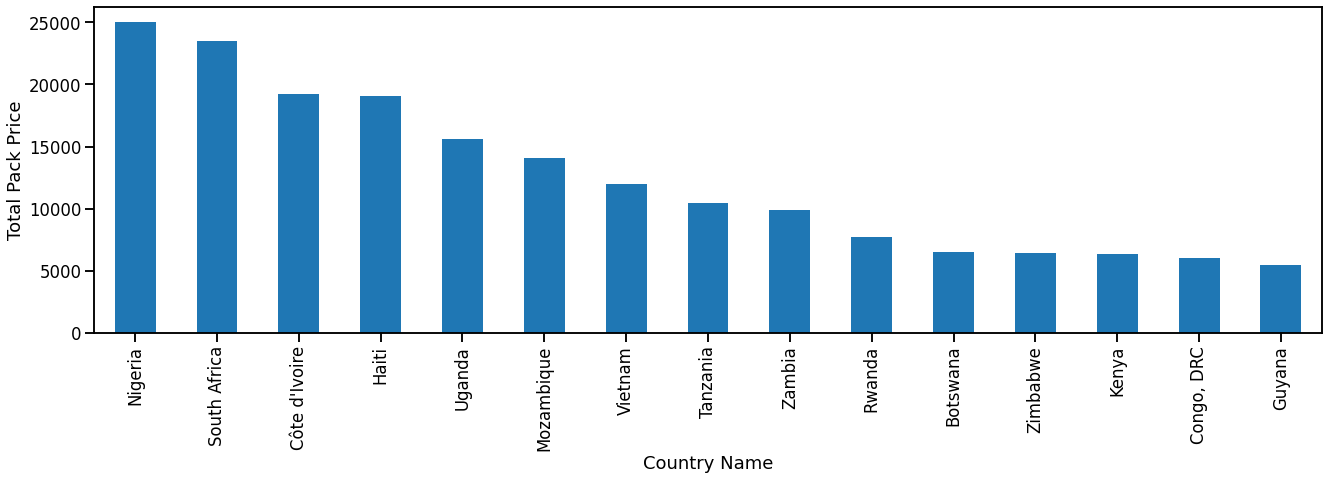

In [ ]:
TotalPrice = df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=df.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

## Unique Manufactoring Sites

In [ ]:
sites = df['Manufacturing Site'].unique()
print(sites)

['Ranbaxy Fine Chemicals LTD' 'Aurobindo Unit III, India'
 'ABBVIE GmbH & Co.KG Wiesbaden' 'Ranbaxy, Paonta Shahib, India'
 'MSD South Granville Australia' "ABBVIE (Abbott) St. P'burg USA"
 'ABBVIE Ludwigshafen Germany' 'Trinity Biotech, Plc'
 'EY Laboratories, USA' 'Cipla, Goa, India' 'BMS Meymac, France'
 'Premier Med. Corp Ltd. India' 'Chembio Diagnostics Sys. Inc.'
 'Inverness Japan' 'Pacific Biotech, Thailand'
 'Standard Diagnostics, Korea' 'Gilead(Nycomed) Oranienburg DE'
 'Bio-Rad Laboratories' 'Mylan (formerly Matrix) Nashik' 'Roche Basel'
 'GSK Ware (UK)' 'Novartis Pharma AG, Switzerland'
 'BI, Ingelheim, Germany' 'Not Applicable' 'Ipca Dadra/Nagar Haveli IN'
 'MSD, Haarlem, NL' 'Aspen-OSD, Port Elizabeth, SA'
 'ABBVIE (Abbott) Logis. UK' 'Gland Pharma Ltd Pally Factory'
 'GSK Mississauga (Canada)' 'GSK Aranda' 'Hetero Unit III Hyderabad IN'
 'ABBVIE (Abbott) France' 'Strides, Bangalore, India.' 'ABBSP'
 'Cipla, Patalganga, India' 'GSK Cape Town Factory (South Africa)'
 "MSD M

## Shipment mode with pack price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


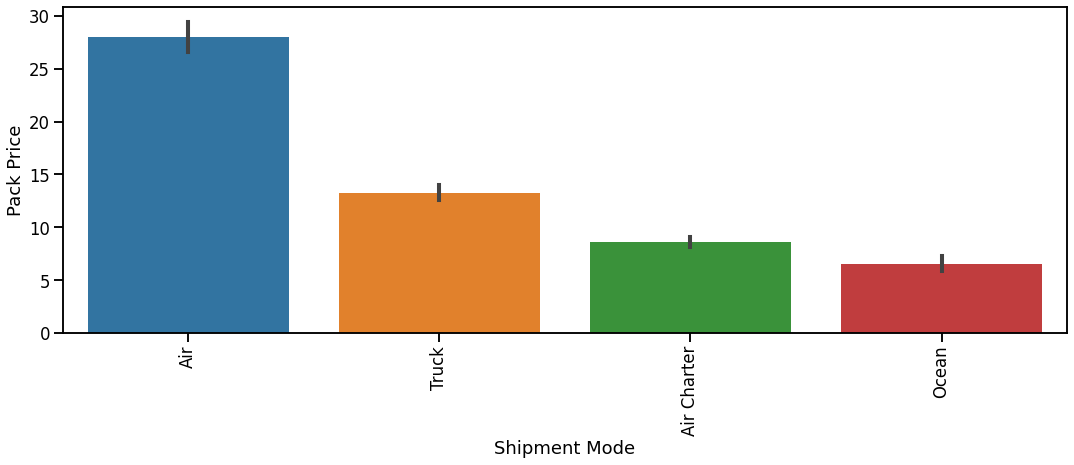

In [ ]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sns.barplot('Shipment Mode','Pack Price', data = df)
plt.show()

## Shipment mode with unit price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


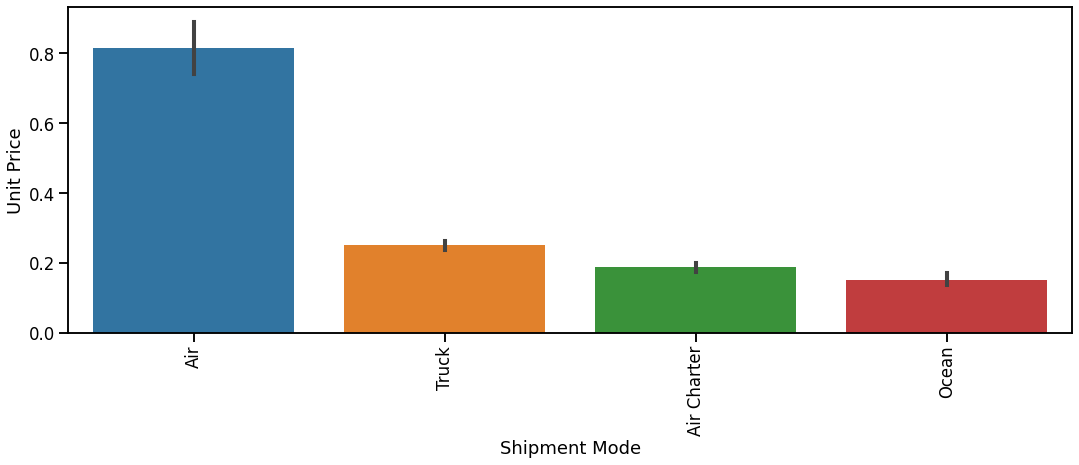

In [ ]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sns.barplot('Shipment Mode','Unit Price', data = df)
plt.show()

## Top 10 Manufacturing Site for all Shipment Mode with Graph

Manufacturing Site
Aurobindo Unit III, India         3031
Mylan (formerly Matrix) Nashik    1407
Hetero Unit III Hyderabad IN       868
Cipla, Goa, India                  634
Strides, Bangalore, India.         533
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               395
ABBVIE Ludwigshafen Germany        354
Inverness Japan                    337
ABBVIE (Abbott) Logis. UK          207
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

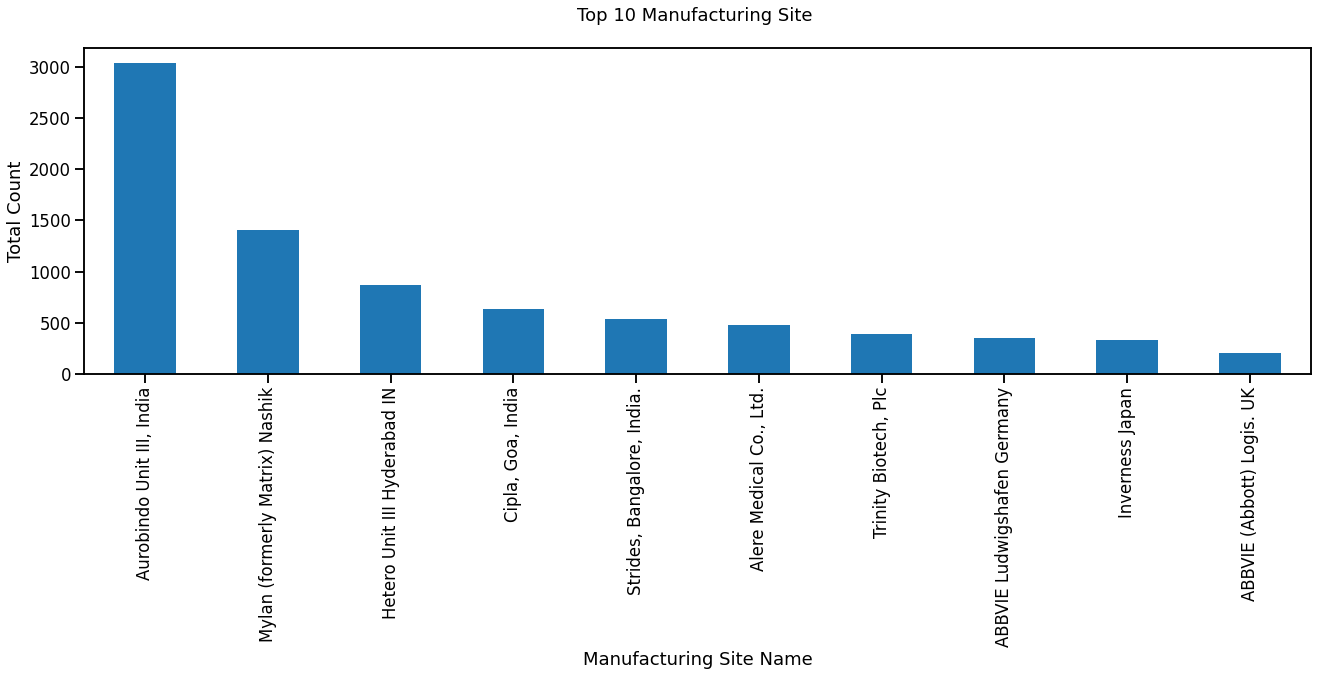

In [ ]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=df.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

## Shipment Mode, Min and Mean value for Air

In [ ]:
ItemData=df[df['Shipment Mode']=='Air']
print ("The Max Air Shipment Mode is :",df['Unit of Measure (Per Pack)'].max())
print ("The Min Air Shipment is :",df['Unit of Measure (Per Pack)'].min())
ItemTypeMean = df['Unit of Measure (Per Pack)'].mean()
print ("The Mean Air Shipment is :", round(ItemTypeMean,2))

The Max Air Shipment Mode is : 1000
The Min Air Shipment is : 1
The Mean Air Shipment is : 77.43


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'First Line Designation')

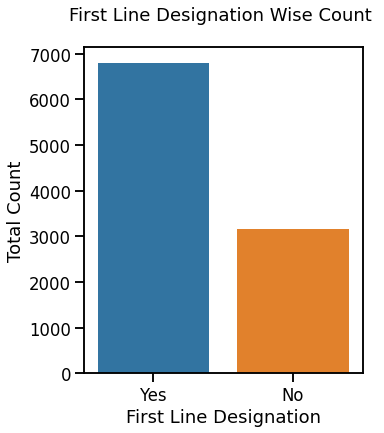

In [ ]:
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(5,6))
sns.countplot(df['First Line Designation'],order = df['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')